In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/MyDrive/KHDL-CK-19N13-Team3/submit/crawl_data"

Mounted at /content/gdrive
/content/gdrive/MyDrive/KHDL-CK-19N13-Team3/submit/crawl_data


## Đọc dữ liệu thô

In [61]:
FPTSHOP_RAW = "../raw/fptshop.csv"
CELLPHONE_RAW = "../raw/cellphone.csv"
PHILONG_RAW = "../raw/philong.csv"
EXPORT_FILE = "./test_clean_dataset_v1.csv"

### Cellphone

In [5]:
dfCellphoneRaw = pd.read_csv(CELLPHONE_RAW)

In [6]:
dfCellphoneRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Title                  801 non-null    object
 1   Description            729 non-null    object
 2   Price sale             705 non-null    object
 3   Price origin           669 non-null    object
 4   Loại CPU               793 non-null    object
 5   Loại card đồ họa       784 non-null    object
 6   Dung lượng RAM         774 non-null    object
 7   Loại RAM               729 non-null    object
 8   Ổ cứng                 791 non-null    object
 9   Kích thước màn hình    791 non-null    object
 10  Độ phân giải màn hình  778 non-null    object
 11  Công nghệ màn hình     695 non-null    object
 12  Màn hình cảm ứng       679 non-null    object
 13  Chất liệu tấm nền      612 non-null    object
 14  Độ phân giải           752 non-null    object
 15  Cổng giao tiếp         

In [7]:
def filter_column_notnull(df, percent=0.8):
  filtered_column = []
  for column in df.columns:
    if (df[column].notnull().sum() > percent * df.shape[0]):
      filtered_column.append(column)
  return filtered_column

In [8]:
filtered_column = filter_column_notnull(dfCellphoneRaw)
filtered_column

['Title',
 'Description',
 'Price sale',
 'Price origin',
 'Loại CPU',
 'Loại card đồ họa',
 'Dung lượng RAM',
 'Loại RAM',
 'Ổ cứng',
 'Kích thước màn hình',
 'Độ phân giải màn hình',
 'Công nghệ màn hình',
 'Màn hình cảm ứng',
 'Độ phân giải ',
 'Cổng giao tiếp',
 'Pin',
 'Hệ điều hành',
 'Wi-Fi',
 'Bluetooth',
 'Kích thước',
 'Trọng lượng',
 'Tính năng đặc biệt',
 'url']

In [9]:
dfCellphoneRaw = dfCellphoneRaw[dfCellphoneRaw['Price sale'].notna()]

In [10]:
dfCellphoneRaw.shape

(705, 40)

### fptshop

In [12]:
dfFptRaw = pd.read_csv(FPTSHOP_RAW)
dfFptRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       239 non-null    object 
 1   Price sale                  237 non-null    object 
 2   Price origin                229 non-null    object 
 3   Kích thước                  215 non-null    object 
 4   Trọng lượng sản phẩm        237 non-null    object 
 5   Tản nhiệt                   115 non-null    object 
 6   Chất liệu                   211 non-null    object 
 7   Hãng CPU                    232 non-null    object 
 8   Công nghệ CPU               239 non-null    object 
 9   Loại CPU                    230 non-null    object 
 10  Tốc độ CPU                  230 non-null    object 
 11  Tốc độ tối đa               222 non-null    object 
 12  Số nhân                     238 non-null    float64
 13  Số luồng                    237 non

In [13]:
filtered_column = filter_column_notnull(dfFptRaw)
filtered_column

['Title',
 'Price sale',
 'Price origin',
 'Kích thước',
 'Trọng lượng sản phẩm',
 'Chất liệu',
 'Hãng CPU',
 'Công nghệ CPU',
 'Loại CPU',
 'Tốc độ CPU',
 'Tốc độ tối đa',
 'Số nhân',
 'Số luồng',
 'Bộ nhớ đệm',
 'Dung lượng RAM',
 'Loại RAM',
 'Tốc độ RAM',
 'Số khe cắm rời',
 'Số khe RAM còn lại',
 'Số RAM onboard',
 'Kích thước màn hình',
 'Công nghệ màn hình',
 'Độ phân giải',
 'Loại màn hình',
 'Tần số quét',
 'Tấm nền',
 'Màn hình cảm ứng',
 'Hãng',
 'Model',
 'Kiểu ổ cứng',
 'Tổng số khe cắm SSD/HDD',
 'Số khe SSD/HDD còn lại',
 'Loại SSD',
 'Dung lượng',
 'Cổng giao tiếp',
 'Wifi',
 'Bluetooth',
 'Webcam',
 'Số lượng loa',
 'Kiểu bàn phím',
 'Loại PIN',
 'Dung lượng pin',
 'OS',
 'Version',
 'Type',
 'url']

### philong

In [14]:
dfPhilongRaw = pd.read_csv(PHILONG_RAW)

In [15]:
dfPhilongRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Columns: 269 entries, Title to kích thước (w x d x h)
dtypes: float64(5), object(264)
memory usage: 733.6+ KB


In [16]:
filtered_column = filter_column_notnull(dfPhilongRaw, 0.3)
filtered_column

['Title',
 'Price sale',
 'Price origin',
 'hãng sản xuất',
 'tên sản phẩm',
 'bộ nhớ đệm',
 'ram',
 'số khe cắm',
 'dung lượng',
 'tốc độ vòng quay',
 'khe cắm ssd mở rộng',
 'ổ đĩa quang (odd)',
 'độ phân giải',
 'card màn hình',
 'wireless',
 'lan',
 'bluetooth',
 'kiểu bàn phím',
 'chuột',
 'kết nối usb',
 'kết nối hdmi/vga',
 'tai nghe',
 'camera',
 'card mở rộng',
 'loa',
 'kiểu pin',
 'sạc pin',
 'hệ điều hành\xa0(bản quyền) đi kèm',
 'kích thước (dài x rộng x cao)',
 'trọng lượng',
 'màu sắc',
 'url',
 'hệ điều hành',
 'màn hình',
 'webcam',
 'pin',
 'bộ vi xử lý',
 'tốc độ']

In [17]:
dfPhilongRaw.rename(columns={'ram': 'Dung lượng RAM', 'màn hình': 'Kích thước màn hình', 'bộ vi xử lý': 'Loại CPU', 'kiểu pin': 'Pin', 'bluetooth': 'Bluetooth', 'trọng lượng': 'Trọng lượng', 'hệ điều hành': 'Hệ điều hành', 'dung lượng': 'Ổ cứng'}, inplace=True)
dfPhilongRaw['Độ phân giải màn hình'] = dfPhilongRaw['Kích thước màn hình']

In [18]:
dfPhilongRaw = dfPhilongRaw[dfPhilongRaw["Dung lượng RAM"].notnull()]

## Merge data

In [19]:
dfFptRaw.rename(columns={'Độ phân giải': 'Độ phân giải màn hình', 'Dung lượng pin': 'Pin', 'Trọng lượng sản phẩm': 'Trọng lượng', 'OS': 'Hệ điều hành', 'Dung lượng': 'Ổ cứng'}, inplace=True)

In [20]:
dfMerged = dfCellphoneRaw.append([dfFptRaw, dfPhilongRaw])
dfMerged.tail(5)

,Title,Description,Price sale,Price origin,Loại CPU,Loại card đồ họa,Dung lượng RAM,Loại RAM,Ổ cứng,Kích thước màn hình,...,số cổng lưu trữ,tính năng.1,thiết kế (h x w x d),sản phẩm,mạng không dây,hard disk,driver,audilo,fingerprint reader,kích thước (w x d x h)
262,Laptop Acer Gaming Aspire 7 A715-42G-R05G (NH....,NaN,16.990.000đ,22.290.000đ,NaN,NaN,8GB khe rời,NaN,SSD 512GB PCIe NVMe,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,Laptop Asus ZenBook Flip 13 Evo UX363EA-HP726W...,NaN,23.290.000đ,NaN,NaN,NaN,8GB,NaN,SSD 512GB PCIe® NVMe™ 3.0 x2 M.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,Laptop Acer Swift 3 Evo SF314 511 59LV (i5-113...,NaN,Liên hệ,NaN,NaN,NaN,16GB LPDDR4X 4266MHz Onboard,NaN,NaN,"14""Full HD (1920 x 1080) 60Hz, Tấm nền IPS",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,"LAPTOP ACER NITRO 5 AN515-57-720A (i7-11800H,8...",NaN,Liên hệ,NaN,NaN,NaN,"8GB DDR4 3200MHz (2 slot SO-DIMM socket, nâng ...",NaN,NaN,15.6 inch FHD(1920 x 1080) IPS 144Hz SlimBezel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,Laptop ASUS TUF Gaming F17 FX706HE-HX011T (i7-...,NaN,Liên hệ,NaN,NaN,NaN,"8GB DDR4 3200MHz (2x SO-DIMM socket, up to 32G...",NaN,NaN,"17.3"" FHD (1920 x 1080) IPS, 144Hz, Wide View,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
dfMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 347
Columns: 345 entries, Title to kích thước (w x d x h)
dtypes: float64(12), object(333)
memory usage: 2.8+ MB


In [22]:
filtered_column = filter_column_notnull(dfMerged, 0.6)
filtered_column

['Title',
 'Description',
 'Price sale',
 'Price origin',
 'Loại CPU',
 'Loại card đồ họa',
 'Dung lượng RAM',
 'Loại RAM',
 'Ổ cứng',
 'Kích thước màn hình',
 'Độ phân giải màn hình',
 'Công nghệ màn hình',
 'Màn hình cảm ứng',
 'Độ phân giải ',
 'Cổng giao tiếp',
 'Pin',
 'Hệ điều hành',
 'Đèn bàn phím',
 'Webcam',
 'Wi-Fi',
 'Bluetooth',
 'Kích thước',
 'Trọng lượng',
 'Công nghệ âm thanh',
 'Tính năng đặc biệt',
 'url']

In [23]:
dfMerged = dfMerged[filtered_column]

In [24]:
dfMerged

,Title,Description,Price sale,Price origin,Loại CPU,Loại card đồ họa,Dung lượng RAM,Loại RAM,Ổ cứng,Kích thước màn hình,...,Hệ điều hành,Đèn bàn phím,Webcam,Wi-Fi,Bluetooth,Kích thước,Trọng lượng,Công nghệ âm thanh,Tính năng đặc biệt,url
0,Laptop Gaming Acer Nitro 5 AN515 45 R6EV,R5-5600H/8GB/512GB PCIE/VGA 4GB GTX1650/15.6FH...,18.690.000 ₫,23.990.000 ₫,"AMD Ryzen 5 5600H, 6 lõi, 12 luồng, 3.30 GHz (...",GeForce GTX 1650 4GB,8GB,"8 GB DDR4 3200 MHz, tối đa 32 GB",512 GB SSD M2. PCIe,15.6 inches,...,Windows 11 Home \t64 bit,Có,HD Web Camera,802.11 ax Wi-Fi 6,v5.0,363.4 x 255 x 23.9 mm (WxDxH),2.2 kg,Acer TrueHarmony,"Ổ cứng SSD, Wi-Fi 6",https://cellphones.com.vn/laptop-gaming-acer-n...
1,Laptop Lenovo Ideapad 5 PRO 14ACN6 82L700M9VN,R5-5600U/16GB/512GB PCIE/14.0 2K/WIN11/XÁM,18.290.000 ₫,21.990.000 ₫,Ryzen 5 AMD Ryzen 5 5600U,AMD Radeon Graphics,16GB,DDR4-3200hz,512GB SSD M.2 2242 PCIe 3.0x4 NVMe,14 inches,...,Windows 11 Home SL,Có,HD 720p,"Wi-Fi 6 11ax, 2x2",v5.1,312.2 x 221 x 15.99-17.99 mm,1.38 kg,"2W x2, Dolby Atmos","Ổ cứng SSD, Wi-Fi 6",https://cellphones.com.vn/laptop-lenovo-ideapa...
2,Laptop Asus Gaming TUF FX506LH HN188W,I5-10300H/8GB/512GB PCIE/VGA 4GB GTX1650/15.6 ...,16.390.000 ₫,21.990.000 ₫,"Intel® Core™ i5-10300H (2.50GHz upto 4.50GHz, ...",NVIDIA® GeForce® GTX 1650 4GB GDDR6,8GB,"8GB DDR4 2933MHz (2 khe, tối đa 32GB)",512GB M.2 NVMe™ PCIe® 3.0 SSD,15.6 inches,...,Windows 11 Home,Có,720P HD camera,Wi-Fi 6(802.11ax),5.2 (Dual band) 2*2,35.9 x 25.6 x 2.47 ~ 2.49 cm (Dài x Rộng x Cao),2.30 kg,NaN,"Ổ cứng SSD, Wi-Fi 6",https://cellphones.com.vn/laptop-asus-gaming-t...
3,Laptop Lenovo ThinkPad E14,I3-1011U/8GB/1TB HDD/14.0 FHD/FREE OS/ĐEN 20RA...,13.490.000 ₫,15.990.000 ₫,"Intel Core i3-10110U (2C / 4T, 2.1 / 4.1GHz, 4MB)",Intel UHD Graphics,8GB,"1x 8GB SO-DIMM DDR4-2666, 1 khe hỗ trợ tối đa ...","1TB HDD, trống 1 khe SSD",14 inches,...,Free OS,NaN,720p Camera,"Intel AX201 11ax, 2x2",v5.2,325 x 232 x 17.9 mm,1.73 kg,"High Definition (HD) Audio, Synaptic CX11880 c...","Ổ cứng SSD, Wi-Fi 6",https://cellphones.com.vn/laptop-lenovo-thinkp...
4,Laptop Dell Inspiron 3511 5G8TF,I3-1115G4/4GB/128GB SSD/15.6 FHD/WIN10/ĐEN NHẬ...,9.990.000 ₫,15.990.000 ₫,i3-1115G4,NaN,4GB,NaN,128GB SSD,15.6 inches,...,Windows 10 Home,NaN,Có,NaN,NaN,21 x 20 x 1.47cm,2kh,NaN,NaN,https://cellphones.com.vn/laptop-dell-inspiron...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Laptop Acer Gaming Aspire 7 A715-42G-R05G (NH....,NaN,16.990.000đ,22.290.000đ,NaN,NaN,8GB khe rời,NaN,SSD 512GB PCIe NVMe,NaN,...,NaN,NaN,NaN,NaN,Bluetooth® 5.1,NaN,2.1kg,NaN,NaN,https://philong.com.vn/laptop-acer-gaming-aspi...
263,Laptop Asus ZenBook Flip 13 Evo UX363EA-HP726W...,NaN,23.290.000đ,NaN,NaN,NaN,8GB,NaN,SSD 512GB PCIe® NVMe™ 3.0 x2 M.2,NaN,...,NaN,NaN,NaN,NaN,Bluetooth 5.0 (Dual band) 2*2,NaN,1.3 kg,NaN,NaN,https://philong.com.vn/laptop-asus-zenbook-fli...
314,Laptop Acer Swift 3 Evo SF314 511 59LV (i5-113...,NaN,Liên hệ,NaN,NaN,NaN,16GB LPDDR4X 4266MHz Onboard,NaN,NaN,"14""Full HD (1920 x 1080) 60Hz, Tấm nền IPS",...,Windows 10 Home Bản Quyền,NaN,NaN,NaN,Bluetooth 5.1,NaN,NaN,NaN,NaN,https://philong.com.vn/laptop-acer-swift-3-evo...
316,"LAPTOP ACER NITRO 5 AN515-57-720A (i7-11800H,8...",NaN,Liên hệ,NaN,NaN,NaN,"8GB DDR4 3200MHz (2 slot SO-DIMM socket, nâng ...",NaN,NaN,15.6 inch FHD(1920 x 1080) IPS 144Hz SlimBezel,...,Windows 11 Home,NaN,NaN,NaN,Bluetooth® 5.1,NaN,2.20 kg,NaN,NaN,https://philong.com.vn/laptop-acer-nitro-5-an5...


In [25]:
dfMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 0 to 347
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Title                  1051 non-null   object
 1   Description            645 non-null    object
 2   Price sale             1049 non-null   object
 3   Price origin           973 non-null    object
 4   Loại CPU               931 non-null    object
 5   Loại card đồ họa       691 non-null    object
 6   Dung lượng RAM         1031 non-null   object
 7   Loại RAM               878 non-null    object
 8   Ổ cứng                 1001 non-null   object
 9   Kích thước màn hình    978 non-null    object
 10  Độ phân giải màn hình  968 non-null    object
 11  Công nghệ màn hình     842 non-null    object
 12  Màn hình cảm ứng       823 non-null    object
 13  Độ phân giải           669 non-null    object
 14  Cổng giao tiếp         921 non-null    object
 15  Pin                   

In [26]:
dfMerged = dfMerged[dfMerged["Price sale"].notnull()]

### Làm sạch dữ liệu và tạo các cột dữ liệu mới từ dữ liệu đã có

In [27]:
df = pd.DataFrame()
df["ProductName"] = dfMerged["Title"]

### Làm sạch giá bán

In [28]:
series = dfMerged["Price sale"]
for i in range(len(series)):
  if isinstance(series.iloc[i], str):
    numbers = re.findall(r"\d+", series.iloc[i])
    if len(numbers) > 0:
      series.iloc[i] = int("".join(numbers))
    else:
      series.iloc[i] = None
  else:
    series.iloc[i] = None
df["PriceSale"] = series

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Tạo cột mới: Hãng laptop

In [29]:
dfMerged["Title"]

0               Laptop Gaming Acer Nitro 5 AN515 45 R6EV
1          Laptop Lenovo Ideapad 5 PRO 14ACN6 82L700M9VN
2                  Laptop Asus Gaming TUF FX506LH HN188W
3                             Laptop Lenovo ThinkPad E14
4                        Laptop Dell Inspiron 3511 5G8TF
                             ...                        
262    Laptop Acer Gaming Aspire 7 A715-42G-R05G (NH....
263    Laptop Asus ZenBook Flip 13 Evo UX363EA-HP726W...
314    Laptop Acer Swift 3 Evo SF314 511 59LV (i5-113...
316    LAPTOP ACER NITRO 5 AN515-57-720A (i7-11800H,8...
347    Laptop ASUS TUF Gaming F17 FX706HE-HX011T (i7-...
Name: Title, Length: 1049, dtype: object

In [30]:
series = dfMerged["Title"].copy()
for i in range(len(series)):
  if isinstance(series.iloc[i], str):
    brands = re.findall("(?i)Acer|Asus|Apple|Macbook|HP|Lenevo|NUC|LG|Huawei|Lenovo|MSI|Dell|Vostro|Microsoft|Surface|Gigabyte|Fujitsu|Chuwi|Avita|Masstel", series.iloc[i])
    if len(brands) > 0:
      brand = brands[0].lower()
      if brand in ["apple", "macbook"]:
        series.iloc[i] = "APPLE"
      elif brand in ["microsoft", "surface"]:
        series.iloc[i] = "MICROSOFT"
      elif brand == "nuc":
        series.iloc[i] = "INTEL"
      elif brand in ["dell", "vostro"]:
        series.iloc[i] = "DELL"
      else:
        series.iloc[i] = brand.upper()
df["Brand"] = series

In [31]:
df["Brand"].unique()

array(['ACER', 'LENOVO', 'ASUS', 'DELL', 'HP', 'APPLE', 'MSI', 'HUAWEI',
       'MICROSOFT', 'LG', 'FUJITSU', 'INTEL', 'GIGABYTE', 'LENEVO',
       'AVITA', 'CHUWI', 'MASSTEL'], dtype=object)

In [32]:
df.groupby(["Brand"]).count()

,ProductName,PriceSale
Brand,,
ACER,86,82
APPLE,62,62
ASUS,304,300
AVITA,3,3
CHUWI,2,2
DELL,139,139
FUJITSU,3,3
GIGABYTE,7,7
HP,129,128


### Ram và dung lượng ram

In [33]:
dfMerged["Dung lượng RAM"].unique()

array(['8GB', '16GB', '4GB', '32GB', '64GB', '12GB', nan, '8 GB',
       '8 GB (2 thanh 4 GB)', '8 GB (1 thanh 8 GB)', '16 GB',
       '16 GB (2 thanh 8 GB)', '4 GB', '4 GB (1 thanh 4 GB)', '32 GB',
       '32 GB (2 thanh 16 GB)', '12 GB', '64 GB', '16GB Soldered',
       '16GB (2x 8GB) SO-DIMM', '8GB(2 x 4GB)\xa0', '8GB khe rời\xa0',
       '16GB(8GB*2) on\xa0board\xa0',
       '8GB (4x2) DDR4 3200MHz\xa0(2x SO-DIMM socket, up to 16GB SDRAM)',
       '8GB DDR4 3200MHz (2 slot SO-DIMM socket, nâng cấp tối đa 32GB SDRAM)',
       '16GB (8GB Soldered DDR4-3200 + 8GB SO-DIMM DDR4-3200)\xa0',
       '4GB (1 x 4GB)',
       '4GB DDR4 2666MHz\xa0Onboard (1x SO-DIMM socket, up to 12GB SDRAM)',
       '8GB (4GB Soldered DDR4-2666 + 4GB SO-DIMM DDR4-2666)', '8GB\xa0',
       '8GB DDR4 (2x SO-DIMM socket, up to 32GB SDRAM)', '\xa08GB(8GBx1)',
       'DDR4 4GB 3200Mhz (2slot, Max 32GB)', '8GB(8GBx1)',
       '16GB (8GB onboard + 1 khe 8GB) DDR4-3200Mhz\xa0', '8GB Soldered',
       '8GB(1x 8GB) SO

In [34]:
series = dfMerged["Dung lượng RAM"]
for i in range(len(series)):
  if series.iloc[i] is not None and isinstance(series.iloc[i], str):
    numbers = re.findall(r"(?i)\d+(?=\s*GB)", series.iloc[i])
    if len(numbers) > 0:
      series.iloc[i] = int(numbers[0])
    else:
      series.iloc[i] = None
  else:
    series.iloc[i] = None
df["RamCapacity"] = series

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Kích thước màn hình

In [35]:
dfMerged["Kích thước màn hình"].unique()

array(['15.6 inches', '14 inches', '13.3 inches', '27 inches',
       '14.2 inches', '12.3 inches', '11.6 inches', nan, '13.4 inches',
       '12.4 inches', '16 inches', '13 inches', '24 inches',
       '16.2 inches', '13.5 inches', '16.1 inches', '17.3 inches',
       '17 inches', '21.5 inches', '15.6 inch', '14.0 inch',
       '14.0 inch Chính:', '16.1 inch', '11.6 inch', '12.4 inch',
       '13.3 inch', '16.2 inch', '14.2 inch', '16.0 inch',
       '13.4 inch Chính:', '13.4 inch', '12.3 inch', '15.6 inch Chính:',
       '16.1 inch Chính:', '17.3 inch', '11.6 inch Chính:',
       '16.0 inch Chính:',
       '14"\xa0FHD (1920 x 1080)\xa0\xa0Anti-glare LED Backlight Non-Touch Narrow Border WVA',
       '15.6 inch FHD(1920 x 1080) IPS 144Hz SlimBezel',
       '15.6" FHD (1920 x 1080) Acer ComfyView LCD, Anti-Glare',
       '15.6" FHD (1920 x 1080) IPS, Anti-Glare, 60Hz',
       '14inch FHD, IPS, 250nits, 45% NTSC, mặt kính, Cảm ứng đa điểm, gập 360',
       '14 Inch FHD (1920x1080) IPS A

In [36]:
series = dfMerged["Kích thước màn hình"]
for i in range(len(series)):
  if series.iloc[i] is not None and isinstance(series.iloc[i], str):
    numbers = re.findall(r"(?i)\d+\.*\d+(?=\s*inch)", series.iloc[i])
    if len(numbers) > 0:
      series.iloc[i] = float(numbers[0])
    else:
      series.iloc[i] = None
  else:
    series.iloc[i] = None
df["DisplaySize"] = series

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Độ phân giải màn hình

In [37]:
dfMerged["Độ phân giải màn hình"].unique()

array(['1920 x 1080 pixels (FullHD)', '2880 x 1800 pixels',
       '1080 x 1920 pixels (FullHD)', nan, '1366 x 768 pixels (HD+)',
       '2560 x 1600 pixels (2K)', '1366 x 768 pixels',
       '2560 x 1600 pixel (2K)', '5120 x 2880 pixels',
       '3024 x 1964 pixels ', '2160 x 1440 pixels', '2736 x 1824 pixels',
       '2560 x 1440 pixels (2K)', '1920 x 1200 pixels (FullHD+)',
       '1536 x 1024 pixels', '2560 x 1600 (WQXGA)', '2880 x 1920 pixels',
       '4480 x 2520 (4.5K)', '3456 x 2234 pixels ', '2256 x 1504 pixels',
       '2560x1440 (Quad HD)', '3840 x 2160 pixels', '2160 x 1350 pixels',
       '4096 x 2304 pixels (4K Retina)', '2560 x 1080 pixels',
       '2240 x 1400 pixels', '1920 x 1080 Pixels', '1366 x 768 Pixels',
       '1920 x 1200 Pixels', '1536 x 1024 Pixels', '3456 x 2234 Pixels',
       '3024 x 1964 Pixels', '2560 x 1440 Pixels', '2560 x 1600 Pixels',
       '2736 x 1824 Pixels', '2880 x 1800 Pixels', '1280 x 720 Pixels',
       '1920 x 1280 Pixels', '2160 x 1440 Pix

In [38]:
series = dfMerged["Độ phân giải màn hình"]
for i in range(len(series)):
  if series.iloc[i] is not None and isinstance(series.iloc[i], str):
    numbers = re.findall(r"(?i)\d+\s*x\s*\d+", series.iloc[i])
    if len(numbers) > 0:
      series.iloc[i] = numbers[0].replace(" ", "")
    else:
      series.iloc[i] = None
  else:
    series.iloc[i] = None
df["DisplayResolution"] = series

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 0 to 347
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ProductName        1049 non-null   object
 1   PriceSale          1037 non-null   object
 2   Brand              1049 non-null   object
 3   RamCapacity        1029 non-null   object
 4   DisplaySize        948 non-null    object
 5   DisplayResolution  964 non-null    object
dtypes: object(6)
memory usage: 57.4+ KB


In [40]:
df['DisplayResolution'].unique()

array(['1920x1080', '2880x1800', '1080x1920', None, '1366x768',
       '2560x1600', '5120x2880', '3024x1964', '2160x1440', '2736x1824',
       '2560x1440', '1920x1200', '1536x1024', '2880x1920', '4480x2520',
       '3456x2234', '2256x1504', '3840x2160', '2160x1350', '4096x2304',
       '2560x1080', '2240x1400', '1280x720', '1920x1280', '1200x1920'],
      dtype=object)

### CPU

In [41]:
dfMerged["Loại CPU"].unique()

array(['AMD Ryzen 5 5600H, 6 lõi, 12 luồng, 3.30 GHz (tối đa 4.20 GHz)',
       'Ryzen 5 AMD Ryzen 5 5600U',
       'Intel® Core™ i5-10300H (2.50GHz upto 4.50GHz, 8MB)',
       'Intel Core i3-10110U (2C / 4T, 2.1 / 4.1GHz, 4MB)', 'i3-1115G4',
       'Intel® Core™ i3-1115G4 (up to 4.1 GHz with Intel® Turbo Boost Technology, 6 MB L3 cache, 2 nhân)',
       'Intel Core i3-1115G4 1.7GHz up to 4.1GHz 6MB',
       'Intel® Core™ i5-1135G7 (2.40GHz up to 4.20GHz, 8MB)',
       'Intel® Pentium® Silver N5030 (1.1 GHz base frequency, up to 3.1 GHz)',
       'Intel Core i5 Tiger Lake - 1135G7, 4 nhân 8 luồng, 8 MB',
       'Intel Pentium Silver N6000 1.1 GHz (4M Cache, up to 3.3 GHz, 4 cores)',
       '8 nhân với 4 nhân hiệu năng cao và 4 nhân tiết kiệm điện',
       'AMD Ryzen 7 4800H', 'AMD Ryzen R5-4600H', 'Intel Core i3 Gen 11',
       'AMD Ryzen 5 5600H',
       '3.1GHz 6-core 10th-generation Intel Core i5 processor Turbo Boost up to 4.5GHz',
       'AMD Ryzen 3-3250U, 2.6GHz upto 3.5GHz, 2 c

In [42]:
null_idx = []
series = dfMerged["Loại CPU"]
for i in range(len(series)):
  if series.iloc[i] is not None and isinstance(series.iloc[i], str):
    s = re.findall(r"(?i)Intel|i3|i5|i7|i9|i10|i11|\d+(G|H|U|P)|N\d+|AMD|Ryzen|Apple|M1", series.iloc[i])
    if len(s) > 0:
      s = s[0].replace(" ", "")
      if s in ["AMD", "Ryzen"]:
        series.iloc[i] = "AMD"
      elif s in ["Apple", "M1"]:
        series.iloc[i] = "APPLE"
      else:
        series.iloc[i] = "INTEL"
    else:
      print(series.iloc[i])
      series.iloc[i] = None
  else:
    series.iloc[i] = None
df["CPUBrand"] = series

8 nhân với 4 nhân hiệu năng cao và 4 nhân tiết kiệm điện
8 nhân với 4 nhân hiệu năng cao và 4 nhân tiết kiệm điện
8 nhân với 4 nhân hiệu năng cao và 4 nhân tiết kiệm điện
8 nhân với 4 nhân hiệu năng cao và 4 nhân tiết kiệm điện
8 nhân với 4 nhân hiệu năng cao và 4 nhân tiết kiệm điện
8 nhân với 4 nhân hiệu năng cao và 4 nhân tiết kiệm điện
8 nhân với 4 nhân hiệu năng cao và 4 nhân tiết kiệm điện
8 nhân với 4 nhân hiệu năng cao và 4 nhân tiết kiệm điện
8 nhân với 4 nhân hiệu năng cao và 4 nhân tiết kiệm điện
8 nhân với 4 nhân hiệu năng cao và 4 nhân tiết kiệm điện
8 nhân với 4 nhân hiệu năng cao và 4 nhân tiết kiệm điện
8 nhân với 4 nhân hiệu năng cao và 4 nhân tiết kiệm điện


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 0 to 347
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ProductName        1049 non-null   object
 1   PriceSale          1037 non-null   object
 2   Brand              1049 non-null   object
 3   RamCapacity        1029 non-null   object
 4   DisplaySize        948 non-null    object
 5   DisplayResolution  964 non-null    object
 6   CPUBrand           917 non-null    object
dtypes: object(7)
memory usage: 65.6+ KB


### Pin capacity & cell

In [44]:
dfMerged["Pin"].unique()

array(['4 Cell, 57.5 W', '56.5Wh', '3-cell, 48WHrs', '3 Cell 65W', nan,
       '3-cell, 41 Wh Li-ion', '2 Cells 38WHrs', '3Cell, 51WHr',
       '3 Cells 42Wh', ' 4-cell Li-ion, 67 Wh', '3-cell Li-ion, 50 Wh',
       '49.9-watt-hour lithium-polymer, củ sạc công suất 30W',
       ' 3-cell Li-ion, 48WHrs, 3S1P', '3-cell', '3 Cell',
       '58.2-watt-hour lithium-polymer, 61W USB-C Power Adapter',
       '2-cell, 37WHrs', '3 cell , 39Whr', '42WHrs, 3S1P, 3-cell Li-ion',
       '56 Wh', '4 Cell 67WHr',
       '43.2 Wh, 60W power supply with USB-A (5W) (65W total) , Supports Fast Charge (0-80% in just over one hour)',
       '4-cell Li-ion, 76 Wh', '3 Cell 48WHr', '3 Cell , 48 Whr',
       '3 Cells 42WHrs', '3 Cell, 39Whrs', '3 cell, 51Wh',
       'Sử dụng nguồn điện 100 – 240V AC', '4-cell, 56WHrs',
       '4-cell, 57.5 Wh', '42 Wh (công suất định mức)', '57.5 Wh',
       'Lên đến 13 giờ (Tùy vào nhu cầu sử dụng)', '4 Cell 75Wh',
       '3Cell 53.5WHrs', '4 Cell (70Wh)\t', '3Cell 45WH',
   

In [45]:
capacitySeries = dfMerged["Pin"]
cellSeries = dfMerged["Pin"].copy()

for i in range(len(capacitySeries)):
  if capacitySeries.iloc[i] is not None and isinstance(capacitySeries.iloc[i], str):
    s = re.findall(r"(?i)\d+\s*\.*\d*(?=Wh)", capacitySeries.iloc[i])
    if len(s) > 0:
      capacitySeries.iloc[i] = float(s[0])
    else:
      capacitySeries.iloc[i] = None
  else:
    capacitySeries.iloc[i] = None
df["PinCapacity"] = capacitySeries

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [46]:
null_idx = []

for i in range(len(capacitySeries)):
  if cellSeries.iloc[i] is not None and isinstance(cellSeries.iloc[i], str):
    cells  = re.findall(r"(?i)\d+(?=\s*\-*cell)", cellSeries.iloc[i])
    if len(cells) > 0:
      cellSeries.iloc[i] = int(cells[0])
    else:
      cellSeries.iloc[i] = None
  else:
    cellSeries.iloc[i] = None
df["PinCell"] = cellSeries

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 0 to 347
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ProductName        1049 non-null   object
 1   PriceSale          1037 non-null   object
 2   Brand              1049 non-null   object
 3   RamCapacity        1029 non-null   object
 4   DisplaySize        948 non-null    object
 5   DisplayResolution  964 non-null    object
 6   CPUBrand           917 non-null    object
 7   PinCapacity        668 non-null    object
 8   PinCell            788 non-null    object
dtypes: object(9)
memory usage: 82.0+ KB


### Bluetooth

In [48]:
dfMerged["Bluetooth"].unique()

array(['v5.0', 'v5.1', '5.2 (Dual band) 2*2', 'v5.2', nan, 'v4.2', '4.2',
       'Bluetooth 5.0', 'Có', 'Bluetooth Wireless 5.0 technology',
       '5.1 (Dual band) 2*2', '5', '5.0', 'Bluetooth Wireless 5.0',
       'BT5.1', '5.1 ', 'Bluetooth 5.1', 'Bluetooth 4.1 (Dual band) 1*1',
       '5.1', '5.0 ', '5.0 (Dual band) 2*2', '5.2', 'Bluetooth® 5.1',
       'Bluetooth v5', 'Bluetooth 5.2', 'v4.1', 'V5.0', 'Bluetooth 5.0 ',
       ' Bluetooth 5.0', '4.2 combo', '4.1', 'BT5.0',
       'Bluetooth 5.2 (Dual band) 2*2', 'Bluetooth® 5.0', 'BT 5.1 (2x2)',
       ' V5.1 ', '5.0 combo', 'Yes', 'Bluetooth 4.2', 'Bluetooth v5.2',
       'V5.0 + LE', 'Bluetooth® 5.2 ', 'Bluetooth® 5 combo', '4.0',
       'Wi-Fi 6 AX 1650i', 'Bluetooth 5.1 (Dual band) 2*2', 'v 5.0',
       'Bluetooth', 'Bluetooth 5.0 (Dual band) 2*2', 'Bluetooth 6.0',
       'BT5.0 ', 'Bluetooth® 5.2', ' Bluetooth 5.1', 'v4.0',
       'Bluetooth® 5 combo (Supporting Gigabit data rate)',
       'Bluetooth® 5 combo, non-vPro®', 'Blue

In [49]:
series = dfMerged["Bluetooth"].copy()

for i in range(len(series)):
  if series.iloc[i] is not None and isinstance(series.iloc[i], str):
    s = re.findall(r"(?i)\d(?=\.\d)", series.iloc[i])
    if len(s) > 0:
      series.iloc[i] = int(s[0])
    else:
      series.iloc[i] = None
  else:
    series.iloc[i] = None
df["Bluetooth"] = series

### Trọng lượng

In [50]:
dfMerged["Trọng lượng"].unique()

array(['2.2 kg', '1.38 kg', '2.30 kg', '1.73 kg ', '2kh', '1.75 kg',
       '1.65 kg', '1.32 kg', '1.47 kg', '1.7 kg', '1.3 kg', '0.78 kg',
       '1.29 kg', '2.1 kg', nan, '2.35 kg', '1.4 kg', '8.92 kg',
       '1.80 kg', '1.55 x 31.26 x 22.12 cm', '1.40 kg', '1,49 kg',
       '1.49 kg', '776 g', '1.2 kg', '1.5 kg', '1.3Kg', '1.86 kg',
       '2.7kg', '1.18 Kg', '2.2 kg ', 'Khoảng 1,56 kg', '2.20 Kg',
       '1.8 kg', '1,110 g', '1.9 kg', '2.25 kg', '1.61 kg', '1.6 kg',
       ' 1.677 kg', '4.46kg', '2.3 kg', '1.17kg', '1.17 kg', '999g',
       '1.66 kg', '1.59kg', '1.69 kg', '2.1kg', '1.57 kg', '1.682 kg',
       '775 g', '1.45 kg', '916 g', '3.6kg', '1.41 kg', '2.65 kg',
       '2.4 kg', '1.27 kg', '891 g', '1.78 kg', '6.3 kg', '1.96 kg',
       '2.38 kg', '2.0 KG', '1.30 kg', '770g', '2.46 kg', '2.4 kg ',
       '1.46 kg', '1.30 Kg', '2.1kg ', '1.99kg ', '1.35kg', '1.14kg',
       '2.30 Kg', '1.39 kg', '2.90 Kg', '1.55 kg', '2.5 kg', '1.6kg',
       '2.81 kg', '1.60 kg', '1.77 kg',

In [51]:
series = dfMerged["Trọng lượng"].copy()

for i in range(len(series)):
  if series.iloc[i] is not None and isinstance(series.iloc[i], str):
    s = re.findall(r"(?i)\d+\.*\d+(?=\s*kg)", series.iloc[i])
    if len(s) > 0:
      series.iloc[i] = float(s[0])
    else:
      series.iloc[i] = None
  else:
    series.iloc[i] = None
df["Weight"] = series

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 0 to 347
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ProductName        1049 non-null   object
 1   PriceSale          1037 non-null   object
 2   Brand              1049 non-null   object
 3   RamCapacity        1029 non-null   object
 4   DisplaySize        948 non-null    object
 5   DisplayResolution  964 non-null    object
 6   CPUBrand           917 non-null    object
 7   PinCapacity        668 non-null    object
 8   PinCell            788 non-null    object
 9   Bluetooth          983 non-null    object
 10  Weight             964 non-null    object
dtypes: object(11)
memory usage: 98.3+ KB


### He dieu hanh

In [53]:
dfMerged["Hệ điều hành"].unique()

array(['Windows 11 Home \t64 bit', 'Windows 11 Home SL ',
       'Windows 11 Home', 'Free OS', 'Windows 10 Home', 'Windows 10',
       'Windows 11', 'Windows 10 Home SL ', nan, 'Windows 10 Home SL',
       'macOS Big Sur', 'Windows 11 SL 64 Bit',
       'Windows 10 Home in S mode', 'Windows 11 Home 64bit', 'MacOS',
       'Mac OS', 'Windows 11 Home 64', 'macOS', 'Windows 11 Home SL',
       'Non-OS', 'Windows 11 64 bit Home Single Language',
       'Windows 10 Home 64', 'PixelSense™ Display , Aspect ratio: 3:2',
       'Window 10 Home', 'Win 11 64 bit', 'Windows 10 Pro hoặc Win 11',
       'Windows 11 Home in S Mode', 'Windows 10 SL', 'Win 11 Home',
       'Windows 10 SL 64 Bit', 'FreeOS', 'Windows 10 Home 64, English',
       ' Windows 10 Home SL', 'WIN 10 - Win ', 'Windows 11 Home 64-bit',
       'Windows 10 & 11', 'macOS Catalina',
       'Windows 10 Home ở chế độ S mode', 'Windows® 10 Home 64',
       'Windows 11 Home SEA', 'OS Windows 10 Home SL',
       'Windows 10 Home 64bit', '

In [54]:
series = dfMerged["Hệ điều hành"].copy()

for i in range(len(series)):
  if series.iloc[i] is not None and isinstance(series.iloc[i], str):
    s = re.findall(r"(?i)window|macos|free", series.iloc[i])
    if len(s) > 0:
      series.iloc[i] = s[0].upper()
    else:
      series.iloc[i] = None
  else:
    series.iloc[i] = None
df["OS"] = series

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 0 to 347
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ProductName        1049 non-null   object
 1   PriceSale          1037 non-null   object
 2   Brand              1049 non-null   object
 3   RamCapacity        1029 non-null   object
 4   DisplaySize        948 non-null    object
 5   DisplayResolution  964 non-null    object
 6   CPUBrand           917 non-null    object
 7   PinCapacity        668 non-null    object
 8   PinCell            788 non-null    object
 9   Bluetooth          983 non-null    object
 10  Weight             964 non-null    object
 11  OS                 932 non-null    object
dtypes: object(12)
memory usage: 106.5+ KB


### Ổ cứng

In [56]:
series = dfMerged["Ổ cứng"].copy()

for i in range(len(series)):
  if series.iloc[i] is not None and isinstance(series.iloc[i], str):
    s = re.findall(r"(?i)\d+(?=\s*GB)", series.iloc[i])
    s2 = re.findall(r"(?i)\d+(?=\s*TB)", series.iloc[i])
    if len(s) > 0:
      series.iloc[i] = int(s[0])
    elif len(s2) > 0:
      series.iloc[i] = 1024*int(s2[0])
    else:
      series.iloc[i] = None
  else:
    series.iloc[i] = None
df["DiskSpace"] = series

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 0 to 347
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ProductName        1049 non-null   object
 1   PriceSale          1037 non-null   object
 2   Brand              1049 non-null   object
 3   RamCapacity        1029 non-null   object
 4   DisplaySize        948 non-null    object
 5   DisplayResolution  964 non-null    object
 6   CPUBrand           917 non-null    object
 7   PinCapacity        668 non-null    object
 8   PinCell            788 non-null    object
 9   Bluetooth          983 non-null    object
 10  Weight             964 non-null    object
 11  OS                 932 non-null    object
 12  DiskSpace          989 non-null    object
dtypes: object(13)
memory usage: 114.7+ KB


## Export

In [62]:
df.to_csv(EXPORT_FILE)

In [63]:
df2 = pd.read_csv(EXPORT_FILE)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1049 non-null   int64  
 1   ProductName        1049 non-null   object 
 2   PriceSale          1037 non-null   float64
 3   Brand              1049 non-null   object 
 4   RamCapacity        1029 non-null   float64
 5   DisplaySize        948 non-null    float64
 6   DisplayResolution  964 non-null    object 
 7   CPUBrand           917 non-null    object 
 8   PinCapacity        668 non-null    float64
 9   PinCell            788 non-null    float64
 10  Bluetooth          983 non-null    float64
 11  Weight             964 non-null    float64
 12  OS                 932 non-null    object 
 13  DiskSpace          989 non-null    float64
dtypes: float64(8), int64(1), object(5)
memory usage: 114.9+ KB


## Visualize

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049 entries, 0 to 347
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ProductName        1049 non-null   object
 1   PriceSale          1037 non-null   object
 2   Brand              1049 non-null   object
 3   RamCapacity        1029 non-null   object
 4   DisplaySize        948 non-null    object
 5   DisplayResolution  964 non-null    object
 6   CPUBrand           917 non-null    object
 7   PinCapacity        668 non-null    object
 8   PinCell            788 non-null    object
 9   Bluetooth          983 non-null    object
 10  Weight             964 non-null    object
 11  OS                 932 non-null    object
 12  DiskSpace          989 non-null    object
dtypes: object(13)
memory usage: 114.7+ KB


### Biểu đồ phân bố hãng laptop

In [69]:
df["Brand"].value_counts().sort_values(ascending=False)

ASUS         304
LENOVO       167
DELL         139
HP           129
MSI          108
ACER          86
APPLE         62
MICROSOFT     18
LG            11
GIGABYTE       7
HUAWEI         6
FUJITSU        3
AVITA          3
CHUWI          2
MASSTEL        2
INTEL          1
LENEVO         1
Name: Brand, dtype: int64

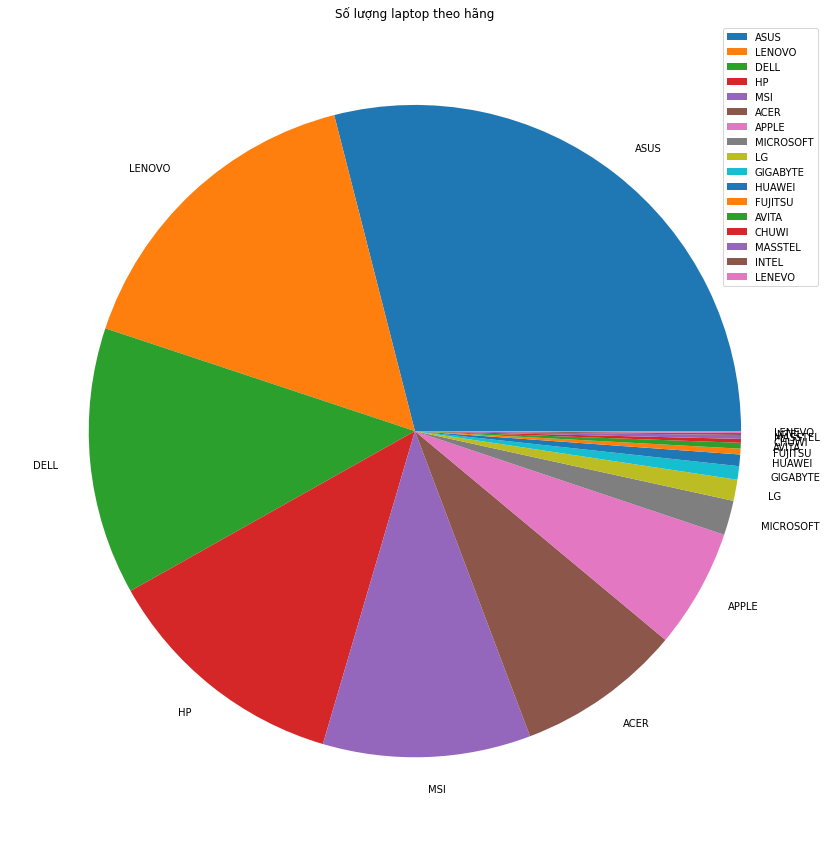

In [74]:
plt.figure(figsize=(20,15))
brands = df["Brand"].value_counts().sort_values(ascending=False)
plt.pie(brands.values, labels=brands.keys())
plt.title("Số lượng laptop theo hãng")
plt.legend(labels=brands.keys())
plt.show()

### Biểu đố phân bố giá bán

In [81]:
price_sale = df["PriceSale"].dropna()

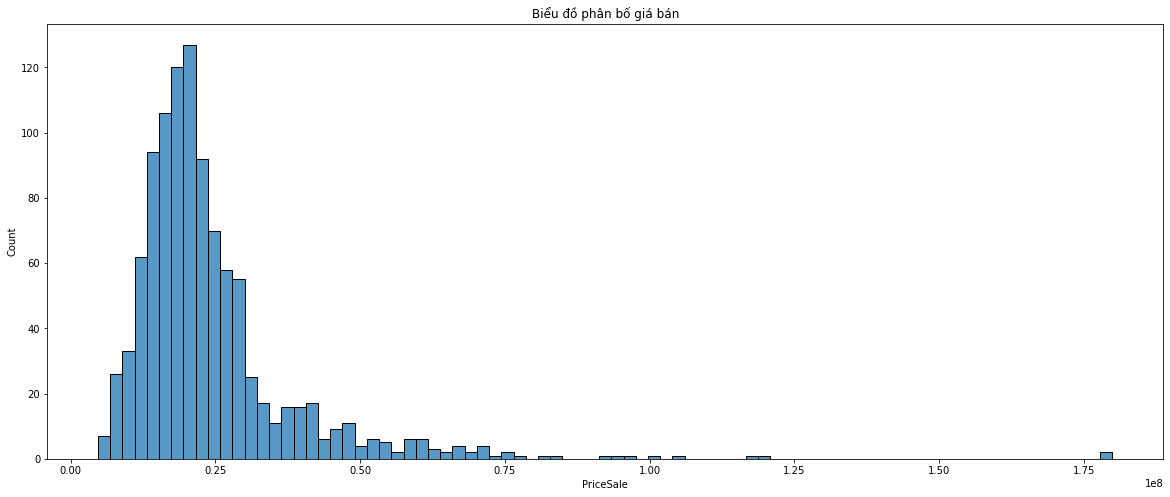

In [90]:
plt.figure(figsize=(20,8))
sns.histplot(data=price_sale)
plt.title("Biểu đồ phân bố giá bán")
plt.show()